<a href="https://cocl.us/DL0320EN_TOP_IMAGE">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0320EN/Assets/Images/Top.png" width="750" alt="IBM 10TB Storage" />
</a>

<h1>Fashion-MNIST Project </h1>

<h2>Table of Contents</h2>

<p>In this project, you will classify  Fashion-MNIST dataset using convolutional neural networks.</p>
<ul>
  
<ul>
<li><a href="#Preparation">Preparation</a></li>
<li><a href="#Q1">Questions 1: Create a Dataset Class</li>
<li><a href="#Train">Define Softmax, Criterion function, Optimizer and Train the Model</a></li>

</ul>
 

</ul>

<p><b>Pascal P., Mar 2020</b></p>
<hr>

<h2 id="Preparation" >Preparation</h2>

Download the datasets you needed for this lab.

The following are the PyTorch modules you are going to need

In [1]:
import time
START_TIME = time.time()

# PyTorch Modules you need for this lab
from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
torch.manual_seed(0)

Import Non-PyTorch Modules 

In [2]:
print(torch.cuda.is_available())
DEV = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(DEV)

True
cuda:0


In [3]:
# Other non-PyTorch Modules
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

from PIL import Image

In [4]:
def show_data(data_sample, img_sz):
    plt.imshow(data_sample[0].numpy().reshape(img_sz, img_sz), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

### Question 1: Create a Dataset Class

In this section, you will load a Dataset object, but first you must transform the dataset. Use the <code>Compose</code> function perform the following transforms:. 

- use the transforms object to<code> Resize </code> to resize the image.
- use the transforms object to<code> ToTensor </code> to concert the image to a tensor.


**You will then take a screen shot of your validation data.**

Use the compose function to compose the transforms: 

In [5]:
# Hint:
IMAGE_SIZE = 16

composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), 
                               transforms.ToTensor()])

<hr>

Create two dataset objects for the Fashion MNIST  dataset. One for training data called <code> dataset_train </code> and one for validation data <code>dataset_val</code>. You will be asked to take a screenshot of several samples.

<b>Hint:</b>
<code>dsets.FashionMNIST(root= './data', train=???, transform=composed,  download=True)</code>

In [6]:
ldir = './data'

dataset_train = dsets.FashionMNIST(root=ldir, train=True, transform=composed,  download=True)
dataset_val = dsets.FashionMNIST(root=ldir, train=False, transform=composed, download=True)

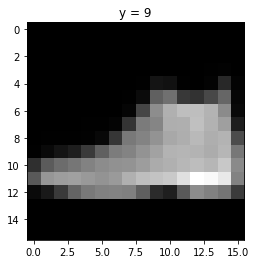

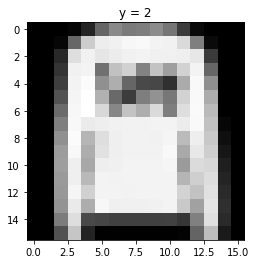

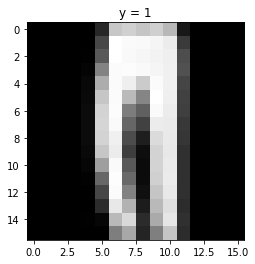

In [7]:
for n, data_sample in enumerate(dataset_val):
    show_data(data_sample, img_sz=IMAGE_SIZE)
    plt.show()
    if n == 2: break 

### Questions 2

Create a Convolutional Neural Network class using ONE of the following constructors.  
Train the network using the provided code then provide **a screenshot of your training cost and accuracy with your validation data**.

Constructor  using Batch Norm 

In [8]:
class CNNBatchNorm(nn.Module):
    ## Contructor
    def __init__(self, out_1=16, out_2=32, num_of_classes=10):
        super().__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        
        self.fc1 = nn.Linear(out_2 * 4 * 4, num_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(num_of_classes)
    
    ## Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        #
        x = self.cnn2(x)
        x = self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        #
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.bn_fc1(x)
        return x

Constructor  for regular Convolutional Neural Network

In [9]:
class CNN(nn.Module):
    ## Contructor
    def __init__(self, out_1=16, out_2=32, num_of_classes=10):
        super().__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        
        self.fc1 = nn.Linear(out_2 * 4 * 4, num_of_classes)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        #
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        #
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

train loader  and validation loader 

In [10]:
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=100)

test_loader  = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=100)

Convolutional Neural Network object:

In [11]:
model = CNN(out_1=16, out_2=32, num_of_classes=10)
model.to(DEV)
model

CNN(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=10, bias=True)
)

Convolutional Neural Network with Batch Normalization object:

In [12]:
model_bn =  CNNBatchNorm(out_1=16, out_2=32, num_of_classes=10)
model_bn.to(DEV)
model_bn

CNNBatchNorm(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv1_bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=10, bias=True)
  (bn_fc1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

Code used to train the model 

In [13]:

def train_model(model, train_loader, test_loader, optimizer, 
                n_epochs=5, n_test=len(dataset_val)):
    cost_list, acc_list = [], []
    for epoch in range(n_epochs):
        cost = 0
        model.train()
        for x, y in train_loader:
            optimizer.zero_grad()
            x, y = x.to(DEV), y.to(DEV)
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            cost += loss.item()
            # cost_list.append(cost)
        
        correct = 0
        ## perform a prediction on the validation  data 
        model.eval()
        for x_test, y_test in test_loader:
            x_test, y_test = x_test.to(DEV), y_test.to(DEV)
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()    
        acc = correct / n_test
        #
        acc_list.append(acc)
        cost_list.append(cost)
        #
    return cost_list, acc_list

In [14]:
# n_test = len(dataset_val)
learning_rate = 0.1
n_epochs=5

In [15]:
## CNN model
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

criterion = nn.CrossEntropyLoss()
start = time.time()

loss_list, acc_list = train_model(model=model, train_loader=train_loader, 
                                  test_loader=test_loader, optimizer=optimizer, 
                                  n_epochs=n_epochs)
print("elapsed time (s): ", time.time() - start)
# cpu: 
# gpu: 29.873773336410522

elapsed time (s):  30.785327911376953


In [17]:
## CNN Batch Normalization model
optimizer = torch.optim.SGD(model_bn.parameters(), lr = learning_rate)

criterion = nn.CrossEntropyLoss()
start = time.time()

loss_list_bn, acc_list_bn = train_model(model=model_bn, train_loader=train_loader, 
                                        test_loader=test_loader, optimizer=optimizer, 
                                        n_epochs=n_epochs)
print("elapsed time (s): ", time.time() - start)
# cpu: 
# gpu: 31.153419017791748s

elapsed time (s):  31.33168935775757


You will use the following to plot the Cost and Accuracy for each epoch for the training and testing data, respectively. 

In [33]:
# fig = plt.figure(figsize=(8.1, 6))
# ax1 = fig.subplots(1, 1)
# color = 'tab:red'
# ax1.plot(loss_list, color=color)
# ax1.set_xlabel('Epoch', color='black')
# ax1.set_ylabel('Cost', color=color)
# ax1.tick_params(axis='y', color=color)
    
# ax2 = ax1.twinx()  
# color = 'tab:blue'
# ax2.plot(acc_list, color=color)
# ax2.set_ylabel('Accuracy', color=color) 
# ax2.set_xlabel('Epoch', color='black')
# ax2.tick_params(axis='y', color=color)
# ax2.set_title('CNN model')
# fig.tight_layout()

In [34]:
# fig = plt.figure(figsize=(8.1, 6))
# ax1 = fig.subplots(1, 1)
# color = 'tab:red'
# ax1.plot(loss_list_bn, color=color)
# ax1.set_xlabel('Epoch', color='black')
# ax1.set_ylabel('Cost', color=color)
# ax1.tick_params(axis='y', color=color)
    
# ax2 = ax1.twinx()
# color = 'tab:blue'
# ax2.plot(acc_list_bn, color=color)
# ax2.set_ylabel('Accuracy', color=color) 
# ax2.set_xlabel('Epoch', color='black')
# ax2.tick_params(axis='y', color=color)
# ax2.set_title('CNN Batch Norm. model')
# fig.tight_layout()

Text(0.5, 1.0, 'CNN Batch Norm. model')

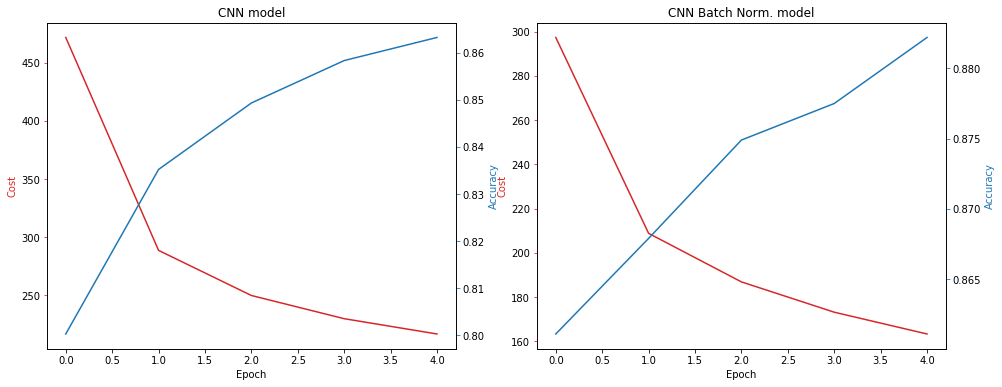

In [32]:
fig = plt.figure(figsize=(16.1, 6))
axs = fig.subplots(1, 2) #, sharey=True)

color = 'tab:red'
axs[0].plot(loss_list, color=color)
axs[0].set_xlabel('Epoch', color='black')
axs[0].set_ylabel('Cost', color=color)
axs[0].tick_params(axis='y', color=color)
    
ax = axs[0].twinx()  
color = 'tab:blue'
ax.plot(acc_list, color=color)
ax.set_ylabel('Accuracy', color=color) 
ax.set_xlabel('Epoch', color='black')
ax.tick_params(axis='y', color=color)
ax.set_title('CNN model')
# fig.tight_layout()

color = 'tab:red'
axs[1].plot(loss_list_bn, color=color)
axs[1].set_xlabel('Epoch', color='black')
axs[1].set_ylabel('Cost', color=color)
axs[1].tick_params(axis='y', color=color)
    
ax = axs[1].twinx()
color = 'tab:blue'
ax.plot(acc_list_bn, color=color)
ax.set_ylabel('Accuracy', color=color) 
ax.set_xlabel('Epoch', color='black')
ax.tick_params(axis='y', color=color)
ax.set_title('CNN Batch Norm. model')
# fig.tight_layout()

In [16]:
print("CNN Model - final loss: {:2.5f} - final accuracy: {:2.2f}%".format(loss_list[-1], acc_list[-1] * 100))

CNN Model - final loss: 216.70483 - final accuracy: 86.32%


In [18]:
print("CNN Model with Batch Normalization - final loss: {:2.5f} - final accuracy: {:2.2f}%"\
      .format(loss_list_bn[-1], acc_list_bn[-1] * 100))

CNN Model with Batch Normalization - final loss: 163.27912 - final accuracy: 88.22%


dataset: https://github.com/zalandoresearch/fashion-mnist

In [21]:
## Done
print("elapsed time (s): ", time.time() - START_TIME)  
# gpu:  65.30063986778259
# cpu:  

elapsed time (s):  65.30063986778259


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a> 

<hr>

Copyright &copy; 2018 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.